In [1]:
import pandas as pd
import matplotlib.pyplot as plt

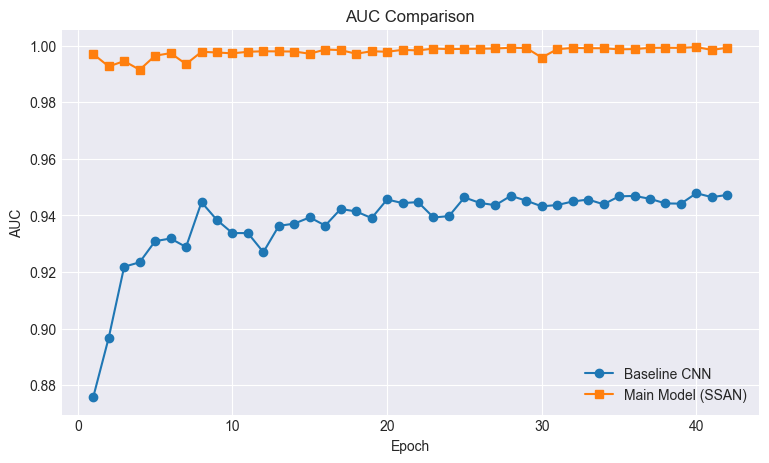

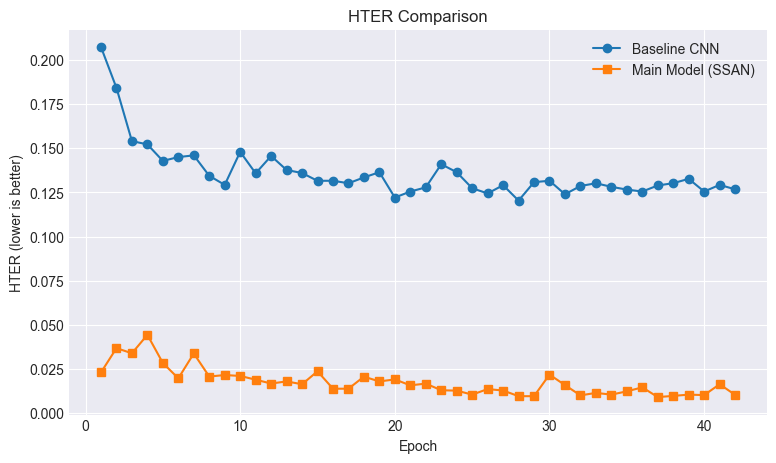

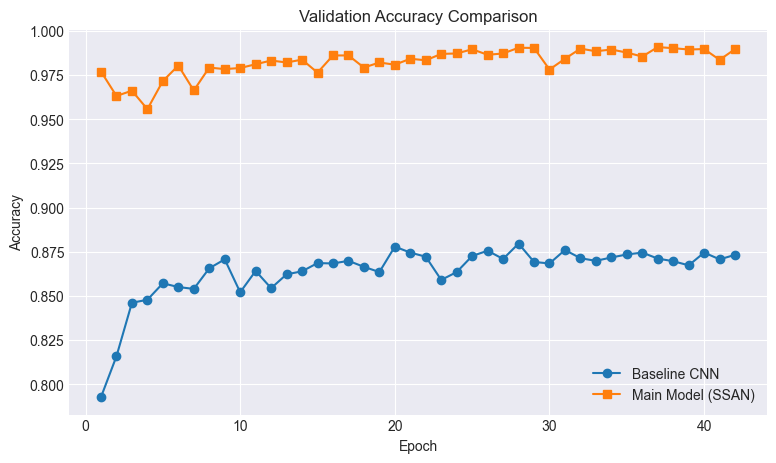

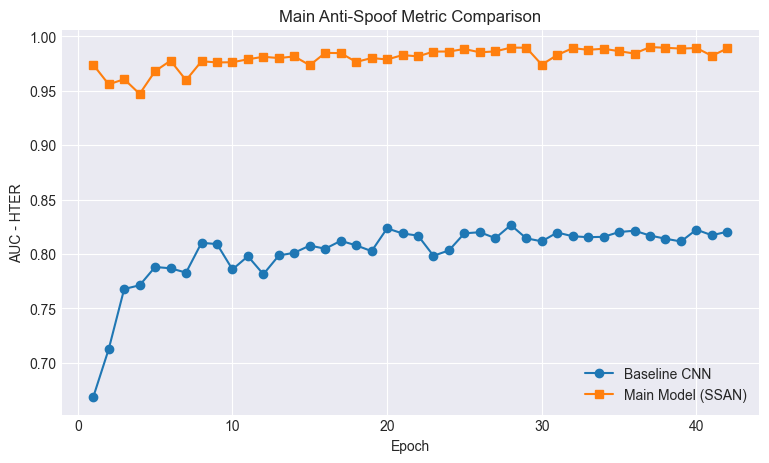

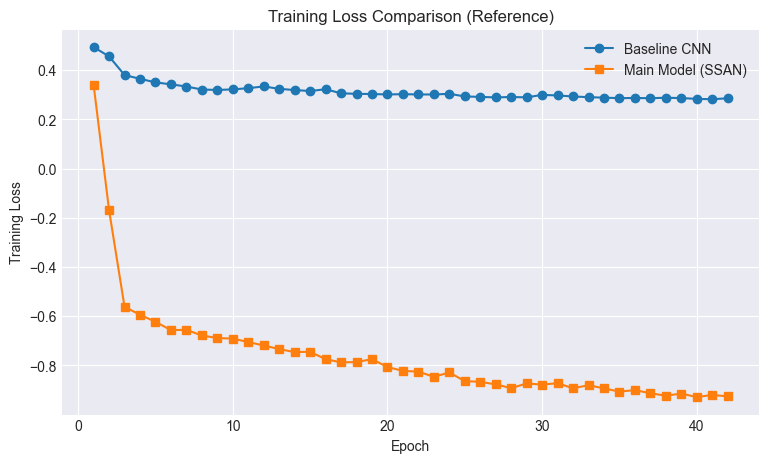

📊 FINAL METRIC SUMMARY (BEST EPOCH)
Baseline CNN:
  AUC  : 0.9478
  HTER : 0.1203
  Metric (AUC-HTER): 0.8266

Main Model (SSAN):
  AUC  : 0.9995
  HTER : 0.0091
  Metric (AUC-HTER): 0.9901


In [2]:
# =========================
# LOAD LOGS
# =========================
baseline_csv = "baseline/training_log/training_log.csv"
main_csv = "results/ssan_custom/log/training_log.csv"

df_base = pd.read_csv(baseline_csv)
df_main = pd.read_csv(main_csv)

# Ensure epoch alignment (nếu số epoch khác nhau)
max_epoch = min(df_base["epoch"].max(), df_main["epoch"].max())
df_base = df_base[df_base["epoch"] <= max_epoch]
df_main = df_main[df_main["epoch"] <= max_epoch]

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (9, 5)

# =========================
# 1️⃣ AUC COMPARISON
# =========================
plt.figure()
plt.plot(df_base["epoch"], df_base["val_auc"], "o-", label="Baseline CNN")
plt.plot(df_main["epoch"], df_main["val_auc"], "s-", label="Main Model (SSAN)")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("AUC Comparison")
plt.legend()
plt.show()

# =========================
# 2️⃣ HTER COMPARISON
# =========================
plt.figure()
plt.plot(df_base["epoch"], df_base["val_hter"], "o-", label="Baseline CNN")
plt.plot(df_main["epoch"], df_main["val_hter"], "s-", label="Main Model (SSAN)")
plt.xlabel("Epoch")
plt.ylabel("HTER (lower is better)")
plt.title("HTER Comparison")
plt.legend()
plt.show()

# =========================
# 3️⃣ ACC COMPARISON
# =========================
plt.figure()
plt.plot(df_base["epoch"], df_base["val_acc"], "o-", label="Baseline CNN")
plt.plot(df_main["epoch"], df_main["val_acc"], "s-", label="Main Model (SSAN)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.show()

# =========================
# 4️⃣ MAIN METRIC: AUC - HTER
# =========================
plt.figure()
plt.plot(
    df_base["epoch"],
    df_base["metric_auc_minus_hter"],
    "o-",
    label="Baseline CNN"
)

main_metric = df_main["val_auc"] - df_main["val_hter"]
plt.plot(
    df_main["epoch"],
    main_metric,
    "s-",
    label="Main Model (SSAN)"
)

plt.xlabel("Epoch")
plt.ylabel("AUC - HTER")
plt.title("Main Anti-Spoof Metric Comparison")
plt.legend()
plt.show()

# =========================
# 5️⃣ TRAINING LOSS (REFERENCE)
# =========================
plt.figure()
plt.plot(df_base["epoch"], df_base["train_loss"], "o-", label="Baseline CNN")
plt.plot(df_main["epoch"], df_main["train_total"], "s-", label="Main Model (SSAN)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison (Reference)")
plt.legend()
plt.show()

# =========================
# SUMMARY PRINT
# =========================
print("=" * 60)
print("📊 FINAL METRIC SUMMARY (BEST EPOCH)")
print("=" * 60)

print(f"Baseline CNN:")
print(f"  AUC  : {df_base['val_auc'].max():.4f}")
print(f"  HTER : {df_base['val_hter'].min():.4f}")
print(f"  Metric (AUC-HTER): {df_base['metric_auc_minus_hter'].max():.4f}")

print("\nMain Model (SSAN):")
print(f"  AUC  : {df_main['val_auc'].max():.4f}")
print(f"  HTER : {df_main['val_hter'].min():.4f}")
print(f"  Metric (AUC-HTER): {(df_main['val_auc'] - df_main['val_hter']).max():.4f}")

print("=" * 60)
